
image 1/1 D:\SBI Life Hack-AI-Thon\Document Verfication\Voter Id\VoterId_Back.jpg: 480x640 1 address, 1 card_voterid_1_back, 1 card_voterid_3_front, 1 portrait, 490.7ms
Speed: 4.6ms preprocess, 490.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


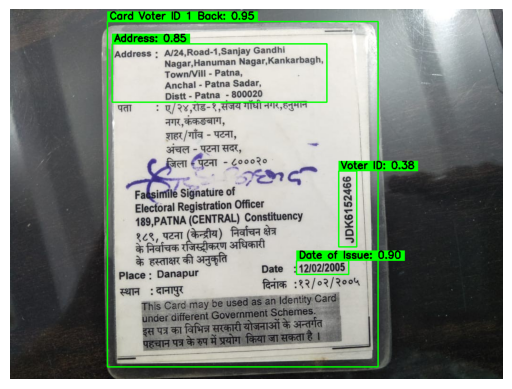

In [66]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# CLASS_NAMES = [
#     "Point", "DOB", "Card Voter ID 1 Front", "Age", "Card Voter ID 2 Front",
#     "Card Voter ID 2 Back", "Symbol", "Election", "Gender", "Card Voter ID 3 Front",
#     "Date", "Address", "Date of Issue", "Father", "Voter ID",
#     "Name", "Card Voter ID 3 Back", "Portrait", "Card Voter ID 1 Back"
# ]

# Define class names for better visualization
CLASS_NAMES = [
    "Address", "Age", "DOB", "Card Voter ID 1 Back", "Card Voter ID 2 Front",
    "Card Voter ID 2 Back", "Card Voter ID 1 Front", "DOB", "Date of Issue", "Election",
    "Father", "Gender", "Name", "Point", "Portrait",
    "Symbol", "Voter ID", "Portrait", "Card Voter ID 1 Back"
]

# Load your trained YOLO model
model = YOLO("./voterId_Annotations.pt")  

# Run inference on an image with confidence threshold 0.25, IoU threshold 0.45, and image size 640
results = model("./VoterId_Back.jpg", imgsz=640)  # Set image size to 640

# Process results
filtered_boxes = {}  # Dictionary to store highest-confidence detections per class
output_image = results[0].orig_img.copy()  # Get original image

for result in results:
    for box in result.boxes:
        cls = int(box.cls[0].item())  # Class ID
        conf = box.conf[0].item()  # Confidence score
        xyxy = box.xyxy[0].tolist()  # Bounding box coordinates [x_min, y_min, x_max, y_max]

        # Keep only the highest confidence detection per class
        if cls not in filtered_boxes or conf > filtered_boxes[cls]['conf']:
            filtered_boxes[cls] = {"conf": conf, "xyxy": xyxy, "class_name": CLASS_NAMES[cls]}

# Draw bounding boxes and labels
for cls, data in filtered_boxes.items():
    x_min, y_min, x_max, y_max = map(int, data["xyxy"])
    conf = data["conf"]
    class_name = data["class_name"]

    # Draw rectangle
    cv2.rectangle(output_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Create label text
    label = f"{class_name}: {conf:.2f}"

    # Get text size for background
    (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
    
    # Draw filled rectangle behind text for better visibility
    cv2.rectangle(output_image, (x_min, y_min - text_height - 5), (x_min + text_width + 10, y_min), (0, 255, 0), -1)
    
    # Put text on top of the filled rectangle
    cv2.putText(output_image, label, (x_min + 5, y_min - 5), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

# Display the image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [67]:
# Print all detected classes before filtering
print("Detected Classes:")
for result in results:
    for box in result.boxes:
        cls = int(box.cls[0].item())  # Class ID
        conf = box.conf[0].item()  # Confidence score
        class_name = CLASS_NAMES[cls]
        print(f"Class: {class_name}, Confidence: {conf:.2f}")

Detected Classes:
Class: Card Voter ID 1 Back, Confidence: 0.95
Class: Date of Issue, Confidence: 0.90
Class: Address, Confidence: 0.85
Class: Voter ID, Confidence: 0.38
